# Fourier-Transforms
###Discrete-Time Fourier Transform (DTFT)
$X_{2\pi}(\omega) = \sum_{n=-\infty}^{\infty} x[n] \,e^{-i \omega n}$

The inverse, IDTFT:

$x[n] = \frac{1}{2 \pi}\int_{2\pi} X_{2\pi}(\omega)\cdot e^{i \omega n} d\omega$

---

###Discrete Fourier Transform (DFT)

$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-\frac {i 2\pi}{N}kn}$

According to Euler's identity:

$e^{ix} = \cos x + j\sin x$

$X_k = \sum_{n=0}^{N-1} x_n \cdot \left[\cos\left(\frac{2 \pi}{N}kn\right) - i \cdot \sin\left(\frac{2 \pi}{N}kn\right)\right]$

The inverse, IDFT:

$x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k\cdot e^{i \frac{2 \pi}{N} k n}$

---

###Fast fourier transform (FFT)
<img src="https://upload.wikimedia.org/wikipedia/commons/c/cb/DIT-FFT-butterfly.png" />




In [16]:
# %%capture
!wget https://www.dropbox.com/s/u8qyvuyie2op286/spk1_snt1.wav
!pip install torch==1.7.1
!pip install speechbrain

--2021-04-08 19:39:32--  https://www.dropbox.com/s/u8qyvuyie2op286/spk1_snt1.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u8qyvuyie2op286/spk1_snt1.wav [following]
--2021-04-08 19:39:33--  https://www.dropbox.com/s/raw/u8qyvuyie2op286/spk1_snt1.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1579837f38e84fbed711adb434.dl.dropboxusercontent.com/cd/0/inline/BMOtyaiHbYquf5pjreqPO2xTTGCZPpoNqHDCdVNtlfHgTGTVVTNmVgPn2xjW_XB-0KoaxdOKmMeFW7-N22NmWZROc_AnTpxTcqIYRs1eu2yQTg4MuErtY7qM2I8rKqL0UQ2z9tO0ZqqEw4Fa03taoVmw/file# [following]
--2021-04-08 19:39:33--  https://uc1579837f38e84fbed711adb434.dl.dropboxusercontent.com/cd/0/inline/BMOtyaiHbYquf5pjreqPO2xTTGCZPpoNqHDCdVNtlfHgTGTVVTNmVgPn2xjW_XB-0KoaxdOKmMeFW7-N22NmWZR

In [13]:
import torch
import matplotlib.pyplot as plt
from speechbrain.dataio.dataio import read_audio
print(torch.__version__)
signal = read_audio('spk1_snt1.wav').unsqueeze(1)
print(signal.shape)

# real signal (img_par is all zeros)
img_part = torch.zeros_like(signal)
signal = torch.cat([signal,img_part],1)

# fft computation
fft = torch.fft.fft(signal,n=None, dim=1,)
print(fft)
print(fft.shape)



1.8.1+cu101
torch.Size([45920, 1])
tensor([[-9.1553e-05+0.j, -9.1553e-05+0.j],
        [-9.1553e-05+0.j, -9.1553e-05+0.j],
        [-9.1553e-05+0.j, -9.1553e-05+0.j],
        ...,
        [-5.3711e-03+0.j, -5.3711e-03+0.j],
        [-5.1880e-03+0.j, -5.1880e-03+0.j],
        [-5.3711e-03+0.j, -5.3711e-03+0.j]])
torch.Size([45920, 2])


/usr/local/lib/python3.7/dist-packages/torch/tensor.py:623: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/usr/local/lib/python3.7/dist-packages/torch/tensor.py:623: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


Text(0.5, 0, 'Freq [Hz]')

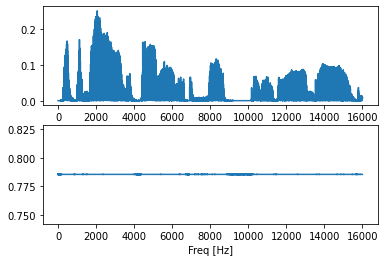

In [11]:
# Real and Imaginary parts
real_fft = fft[:,0]
img_fft = fft[:,1]

mag = torch.sqrt(torch.pow(real_fft,2) + torch.pow(img_fft,2))
phase = torch.arctan(img_fft/real_fft)

plt.subplot(211)
x_axis = torch.linspace(0, 16000, mag.shape[0])
plt.plot(x_axis, mag)

plt.subplot(212)
plt.plot(x_axis, phase)
plt.xlabel('Freq [Hz]')

In [ ]:
!wget https://www.dropbox.com/s/u8qyvuyie2op286/spk1_snt1.wav
%ls -la

--2021-04-08 19:03:52--  https://www.dropbox.com/s/u8qyvuyie2op286/spk1_snt1.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u8qyvuyie2op286/spk1_snt1.wav [following]
--2021-04-08 19:03:52--  https://www.dropbox.com/s/raw/u8qyvuyie2op286/spk1_snt1.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3b9053291873986a90f5a25a0c.dl.dropboxusercontent.com/cd/0/inline/BMMEzpPM5tEHTlZDHDf_sgk_5r9g4tCrfdLjGdIw-cg3jRSUHVYqVFcceERBr6I2qljQqdPZs_HuGg9edzbSSC8o4QRkLuIPOhccw1VqJCHheXp1icbD2ICoYAxHyLPd-DJIfSj-trJR3loiTQrSJ-7K/file# [following]
--2021-04-08 19:03:53--  https://uc3b9053291873986a90f5a25a0c.dl.dropboxusercontent.com/cd/0/inline/BMMEzpPM5tEHTlZDHDf_sgk_5r9g4tCrfdLjGdIw-cg3jRSUHVYqVFcceERBr6I2qljQqdPZs_HuGg9edzbSSC8

In [ ]:
!pwd
!git clone https://github.com/speechbrain/speechbrain.git

/content
Cloning into 'speechbrain'...
remote: Enumerating objects: 620, done.
remote: Counting objects: 100% (620/620), done.
remote: Compressing objects: 100% (364/364), done.
remote: Total 36474 (delta 366), reused 436 (delta 245), pack-reused 35854
Receiving objects: 100% (36474/36474), 57.68 MiB | 24.89 MiB/s, done.
Resolving deltas: 100% (23101/23101), done.


In [ ]:
# %%
%pwd
%cd /content/speechbrain/
%ls -la
!pip install -r requirements.txt
!pip install --editable .
# !pwd
# !wget https://www.dropbox.com/s/u8qyvuyie2op286/spk1_snt1.wav
# !ls -la
# !rm -rf speechbrain
# !git clone https://github.com/speechbrain/speechbrain.git
# !pip install -r requirements.txt
# !pip install --editable .

/content/speechbrain
total 116
drwxr-xr-x 11 root root  4096 Apr  8 19:03 ./
drwxr-xr-x  1 root root  4096 Apr  8 19:03 ../
-rw-r--r--  1 root root   164 Apr  8 19:03 conftest.py
drwxr-xr-x  4 root root  4096 Apr  8 19:03 docs/
-rw-r--r--  1 root root   296 Apr  8 19:03 .flake8
drwxr-xr-x  8 root root  4096 Apr  8 19:03 .git/
drwxr-xr-x  3 root root  4096 Apr  8 19:03 .github/
-rw-r--r--  1 root root  2122 Apr  8 19:03 .gitignore
-rw-r--r--  1 root root 11357 Apr  8 19:03 LICENSE
-rw-r--r--  1 root root    79 Apr  8 19:03 lint-requirements.txt
-rw-r--r--  1 root root   746 Apr  8 19:03 .pre-commit-config.yaml
-rw-r--r--  1 root root   700 Apr  8 19:03 .pre-push-config.yaml
-rw-r--r--  1 root root   239 Apr  8 19:03 pyproject.toml
-rw-r--r--  1 root root   126 Apr  8 19:03 pytest.ini
-rw-r--r--  1 root root 10867 Apr  8 19:03 README.md
-rw-r--r--  1 root root   180 Apr  8 19:03 .readthedocs.yaml
drwxr-xr-x 16 root root  4096 Apr  8 19:03 recipes/
-rw-r--r--  1 root root   238 Apr  8 19: